In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e9/sample_submission.csv
/kaggle/input/playground-series-s5e9/train.csv
/kaggle/input/playground-series-s5e9/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s5e9/train.csv')

In [3]:
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [4]:
df.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [6]:
df.shape

(524164, 11)

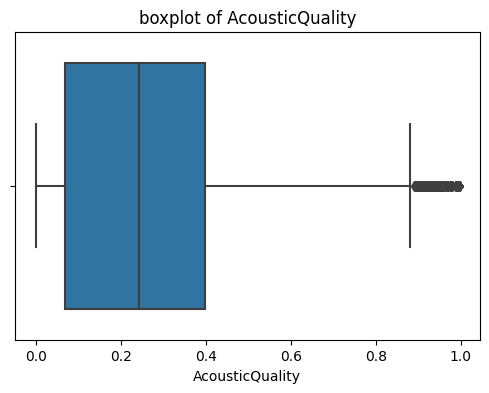

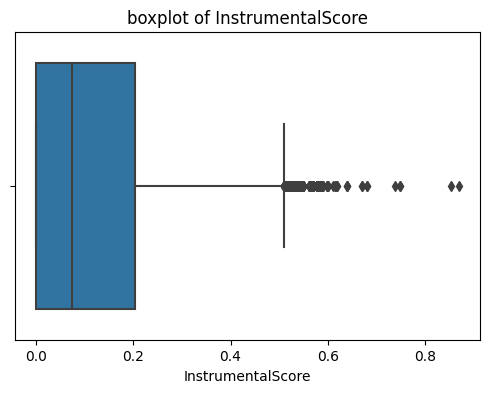

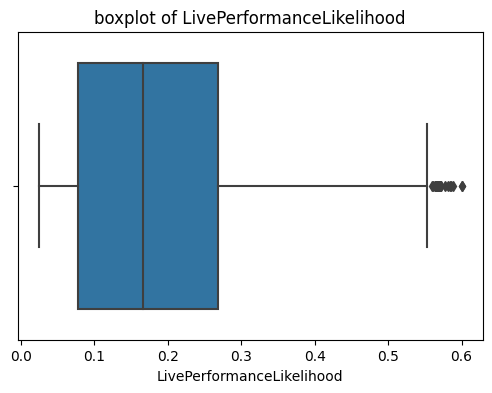

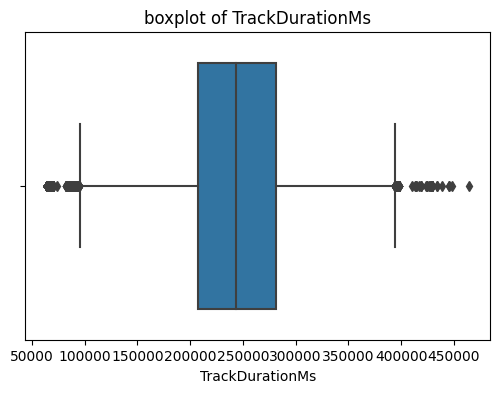

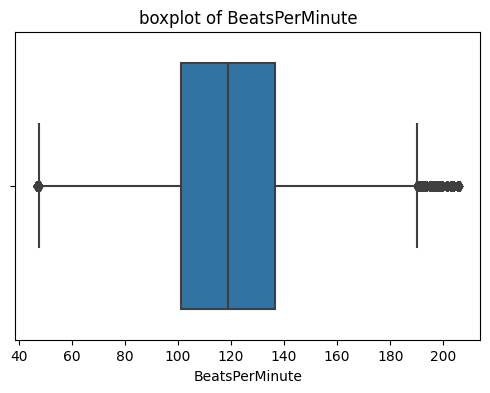

In [7]:
# Outlier-prone features in the dataset according to the statistics:

#Instrumental score, LiveperformanceLikelihood, TrackDurationMs, AcousticQuality, BeatsPerMinute

import matplotlib.pyplot as plt
import seaborn as sns
columns=['AcousticQuality','InstrumentalScore','LivePerformanceLikelihood','TrackDurationMs','BeatsPerMinute']
for col in columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'boxplot of {col}')
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


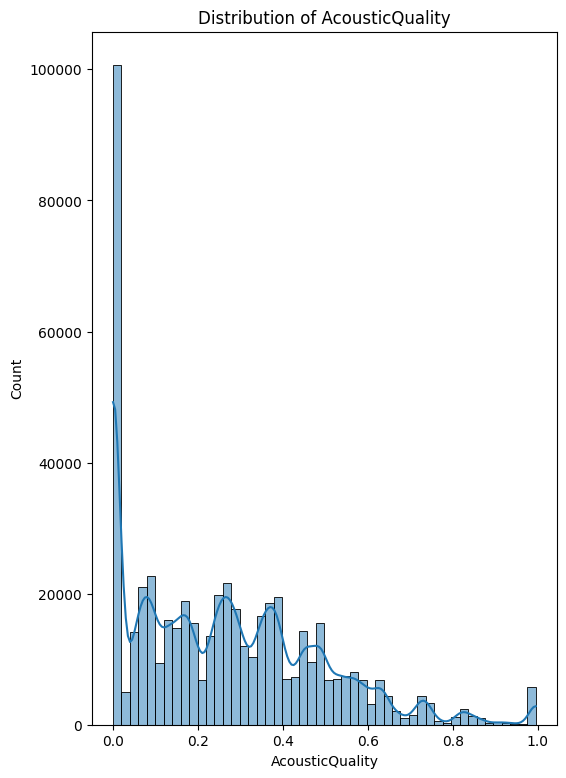

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


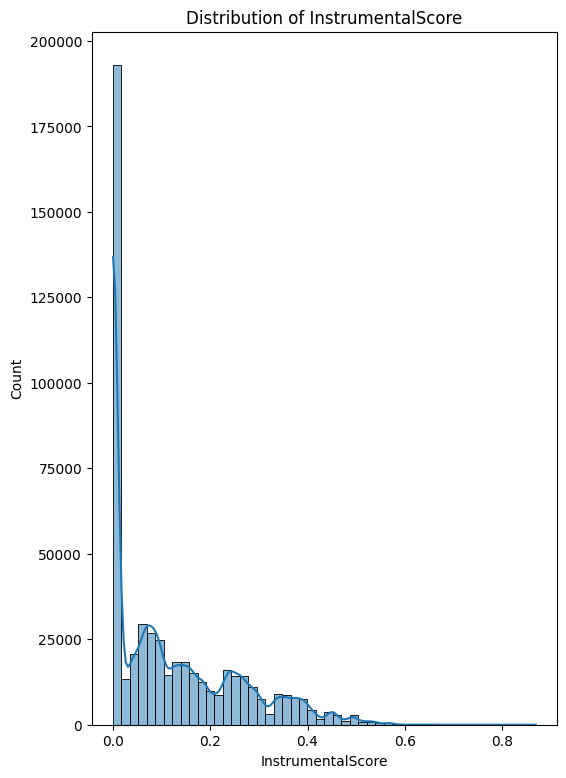

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


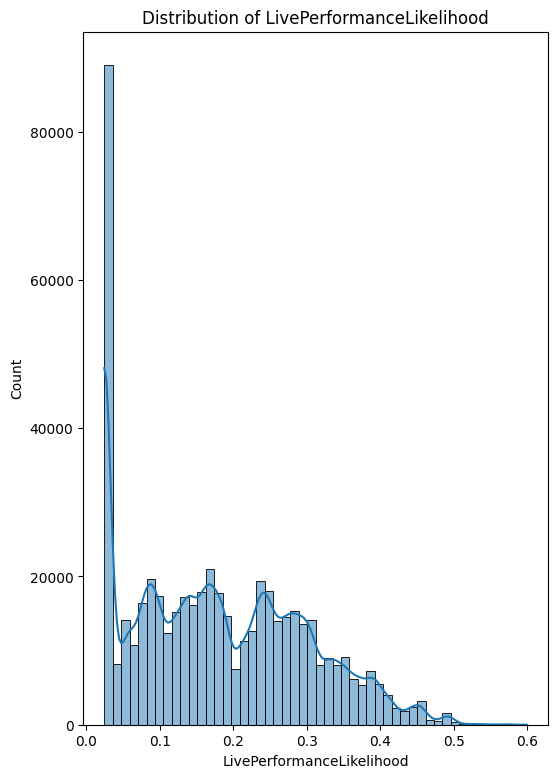

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


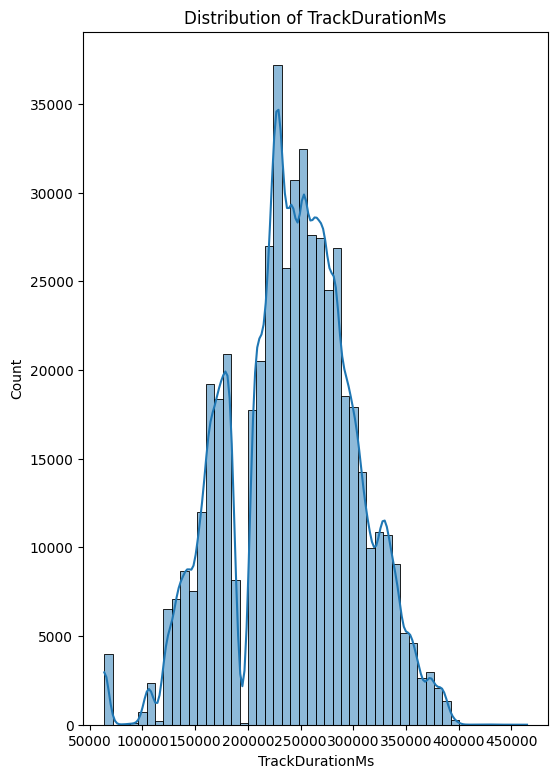

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


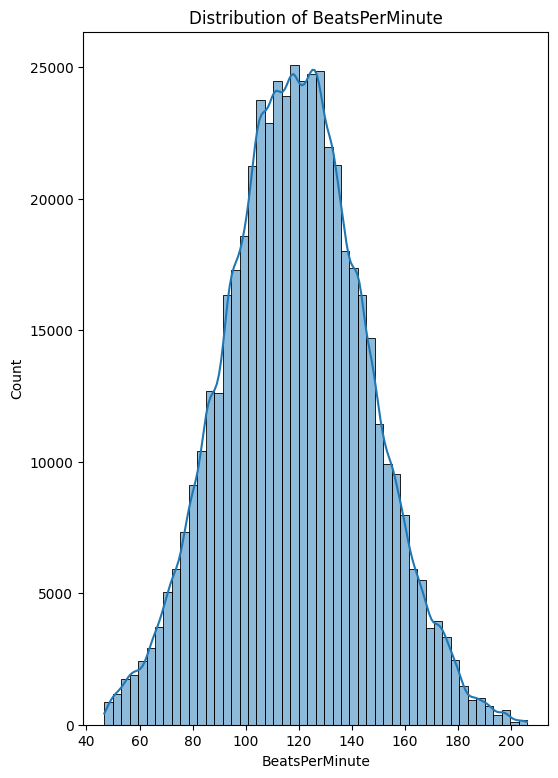

In [8]:
col_to_check=['AcousticQuality','InstrumentalScore','LivePerformanceLikelihood','TrackDurationMs','BeatsPerMinute']
for col in col_to_check:
    plt.figure(figsize=(6,9))
    sns.histplot(df[col],kde=True,bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

In [9]:
# It means AcousticQuality, InstrumentalScore, LivePerformanceLikelihood are right skewed, TrackDuration is approximately normal distribution with slight right skewness
df[col_to_check].skew()

AcousticQuality              0.785966
InstrumentalScore            1.036285
LivePerformanceLikelihood    0.393322
TrackDurationMs             -0.190483
BeatsPerMinute               0.071550
dtype: float64

In [10]:
#Since, skewness is observed in data we will apply log transformation on InstrumentalScore because it's value is gretaer than 1 
#and the reason being we just want to compress large values and nothing else. If we wanted scaling then we copuld have gone for Z-score and all those
df['InstrumentalScore']=np.log1p(df['InstrumentalScore'])

#Now,clipping the values of AcousticQuality and InstrumentalScore to prevent further outliers and keep them within 1st and 99th percentile
for col in ['InstrumentalScore','AcousticQuality']:
    lower,upper=np.percentile(df[col],1),np.percentile(df[col],99)
    df[col]=np.clip(df[col],lower,upper)

In [11]:
correlations=df.corr(numeric_only=True)['BeatsPerMinute'].sort_values(ascending=False)
print(correlations)

BeatsPerMinute               1.000000
MoodScore                    0.007059
TrackDurationMs              0.006637
RhythmScore                  0.005440
VocalContent                 0.004876
LivePerformanceLikelihood    0.003471
InstrumentalScore            0.001966
id                          -0.000355
AcousticQuality             -0.000820
AudioLoudness               -0.003327
Energy                      -0.004375
Name: BeatsPerMinute, dtype: float64


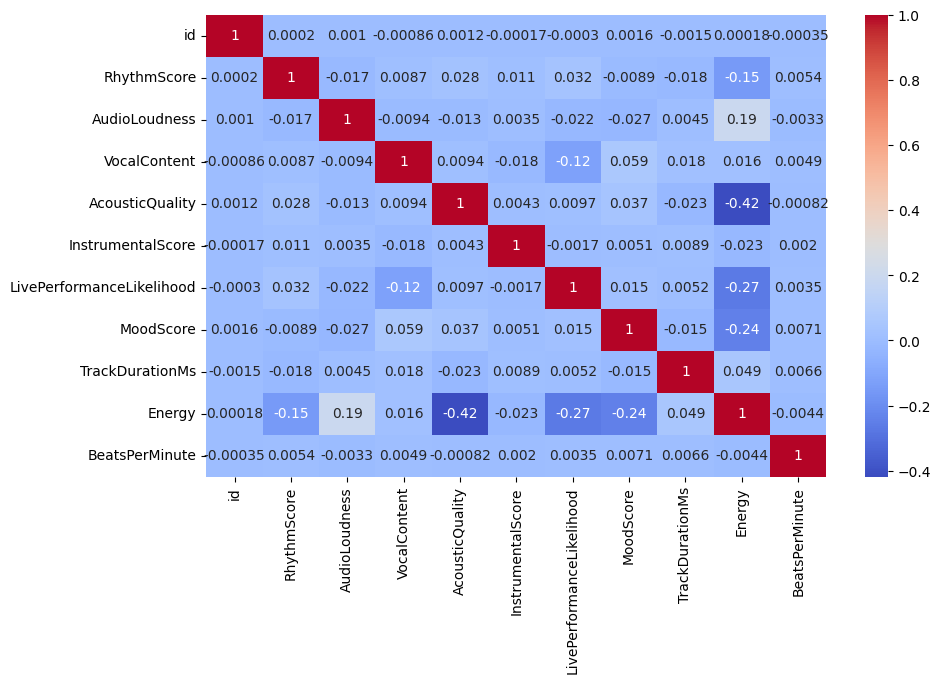

In [12]:
#Visualizing the correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [13]:
#since, the correlations are actually close to 0 or <0.1 and the correlation only captures linear relationship between single feature and target
# That's why we are moving towards non-linear models (it means none of the features have straight line relationship with BPM)

#So, Let's move towards Tree based models
X=df.drop(columns=['id','BeatsPerMinute'])
y=df['BeatsPerMinute']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50,random_state=42,max_depth=15, min_samples_leaf=5, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_val)

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE using Random Forest',mean_squared_error(y_val,y_pred,squared=False))
print('R2 Error using Random Forest',r2_score(y_val,y_pred))

MSE using Random Forest 26.45674957086939
R2 Error using Random Forest -0.0008785486729405712


In [17]:
# As we observed random forst was taking too much of time to train the model. So, we have to move towards other models
#Like GradientBoosting, XGBoost, LightGBM
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor=GradientBoostingRegressor(
    n_estimators=50,
    random_state=42,
    learning_rate=0.1,
    max_depth=15
)
gb_regressor.fit(X_train,y_train)
y_pred=gb_regressor.predict(X_val)

In [18]:
print('MSE using Gradient Boosting',mean_squared_error(y_val,y_pred,squared=False))
print('R2 Error using Gradient Boosting',r2_score(y_val,y_pred))

MSE using Gradient Boosting 26.56847795339309
R2 Error using Gradient Boosting -0.009349934473324772


In [19]:
# Using XGBoost
!pip install xgboost


In [20]:
import xgboost as xgb
xgb_regressor=xgb.XGBRegressor(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=15,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_regressor.fit(X_train,y_train)
y_pred=xgb_regressor.predict(X_val)
print('MSE using XGBoost',mean_squared_error(y_val,y_pred,squared=False))
print('R2 Error using XGBoost',r2_score(y_val,y_pred))

MSE using XGBoost 26.722532819406634
R2 Error using XGBoost -0.021089115142132853


In [21]:
#LightGBM
!pip install lightgbm

In [22]:
import lightgbm as lgb
lgb_regressor=lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=50,
    learning_rate=0.1,
    max_depth=15,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgb_regressor.fit(X_train,y_train)
y_pred=lgb_regressor.predict(X_val)
print('MSE using LightGBM',mean_squared_error(y_val,y_pred,squared=False))
print('R2 Error using LightGBM',r2_score(y_val,y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 419331, number of used features: 9
[LightGBM] [Info] Start training from score 119.056554
MSE using LightGBM 26.440940219693523
R2 Error using LightGBM 0.0003172530103536797


In [23]:
test_df=pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')
test_ids=test_df['id']
test_df['InstrumentalScore']=np.log1p(test_df['InstrumentalScore'])
for col in ['InstrumentalScore','AcousticQuality']:
    lower,upper=np.percentile(df[col],1),np.percentile(df[col],99)
    test_df[col]=np.clip(test_df[col],lower,upper)
X_test=test_df.drop(columns=['id'])
test_predictions=lgb_regressor.predict(X_test)
submission=pd.DataFrame({
    'id':test_ids,
    'BeatsPerMinute':test_predictions
})
submission.to_csv('submission.csv',index=False)